In [53]:
# Set current working directory.
%cd C:\Users\James Makanas\Downloads

C:\Users\James Makanas\Downloads


In [54]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as pltn
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.backends.backend_pdf import PdfPages
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.nonparametric as npar

In [55]:
# Load custom functions written by the professor.
exec(open(r'C:/Users/James Makanas/Downloads/plotHistograms.py', encoding='utf8').read())
exec(open(r'C:/Users/James Makanas/Downloads/nearZeroVar.py', encoding='utf8').read())
exec(open(r'C:/Users/James Makanas/Downloads/findCorrelation.py', encoding='utf8').read())
exec(open(r'C:/Users/James Makanas/Downloads/plotDepvarVsX.py', encoding='utf8').read())

In [56]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [57]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [58]:
# DATA PREPROCESSING 1: NO MISSING VALUES
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [59]:
# Data types
print('\nData types:\n{}'.format(data.dtypes))


Data types:
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [60]:
# Import label encoder to encode categorical variables
from sklearn import preprocessing

# Label encoder shortcut
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels for categorical variables
data['HeartDisease']= label_encoder.fit_transform(data['HeartDisease'])
data['Smoking']= label_encoder.fit_transform(data['Smoking'])
data['AlcoholDrinking']= label_encoder.fit_transform(data['AlcoholDrinking'])
data['Stroke']= label_encoder.fit_transform(data['Stroke'])
data['DiffWalking']= label_encoder.fit_transform(data['DiffWalking'])
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['AgeCategory']= label_encoder.fit_transform(data['AgeCategory'])
data['Race']= label_encoder.fit_transform(data['Race'])
data['Diabetic']= label_encoder.fit_transform(data['Diabetic'])
data['PhysicalActivity']= label_encoder.fit_transform(data['PhysicalActivity'])
data['GenHealth']= label_encoder.fit_transform(data['GenHealth'])
data['Asthma']= label_encoder.fit_transform(data['Asthma'])
data['KidneyDisease']= label_encoder.fit_transform(data['KidneyDisease'])
data['SkinCancer']= label_encoder.fit_transform(data['SkinCancer'])

# Data types
print('\nData types:\n{}'.format(data.dtypes))


Data types:
HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object


In [61]:
# DATA PREPROCESSING 2: NO NEAR-ZERO VARIANCE NUMERICAL VARIABLES
floatVarNames = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
badNames = nearZeroVar(x=data.loc[:,floatVarNames], names=True)

# print variables with near-zero variance.
print('Variables with near-zero variance in data: {}'.format(badNames))

Variables with near-zero variance in data: []


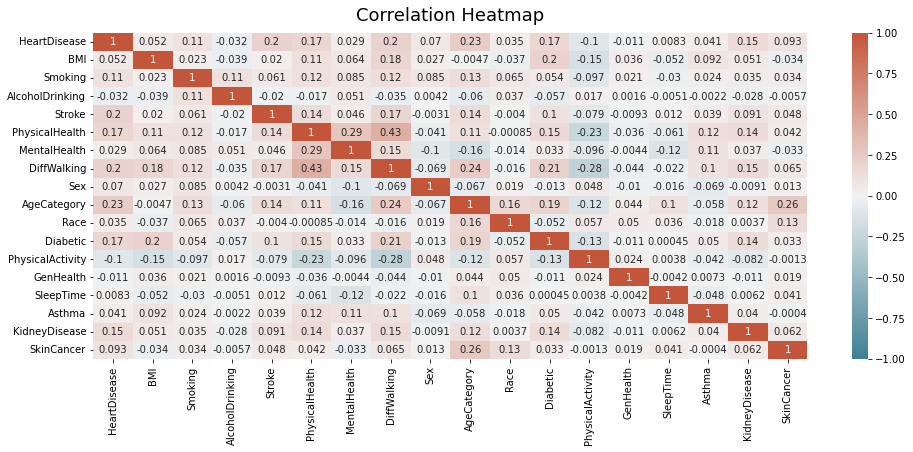

In [62]:
# DATA PREPROCESSING 3: NO COLLINEARITY AMONGST PREDICTORS. HIGHEST CORRELATION COEFFICIENT: .43
import seaborn as sns

plt.figure(figsize=(16, 6))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [63]:
# Apply YeoJohnson transformation to numerical variables to reduce skewness, and center and scale the data.

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
data2 = pd.DataFrame(pt.fit_transform(data[floatVarNames]), columns=data[floatVarNames].columns)
data2['SleepTime']=data['SleepTime']

In [64]:
# Check skewness of the variables.

print(data[floatVarNames].skew())


BMI               1.332431
PhysicalHealth    2.603973
MentalHealth      2.331112
SleepTime         0.679035
dtype: float64


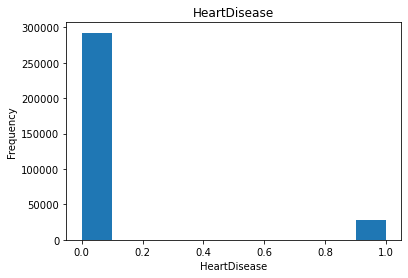

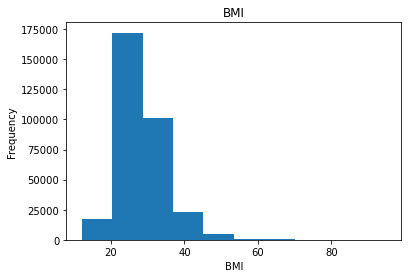

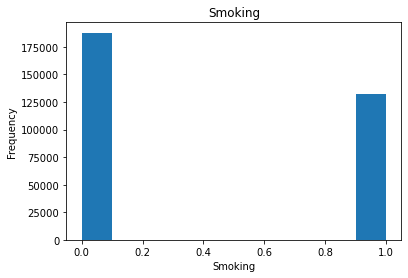

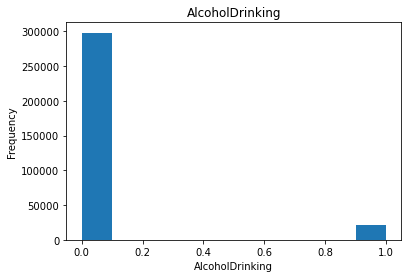

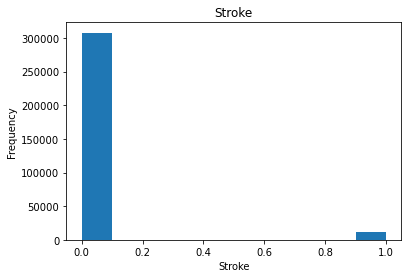

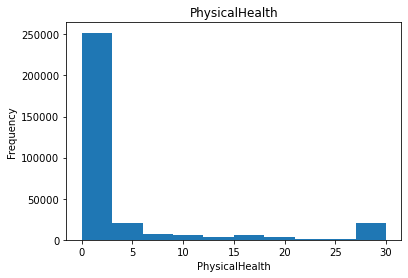

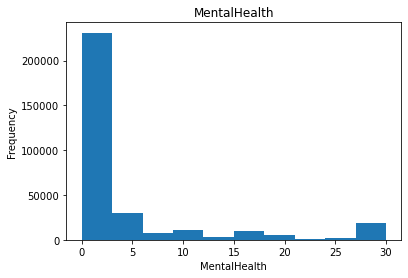

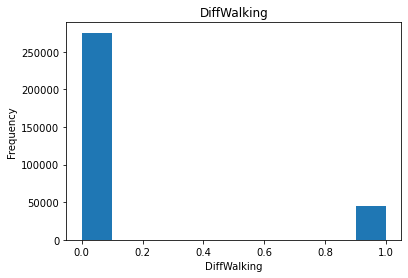

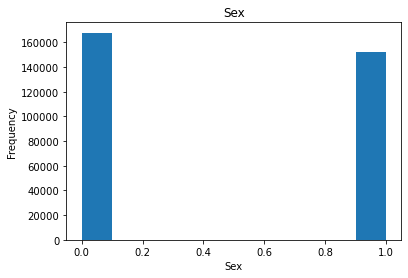

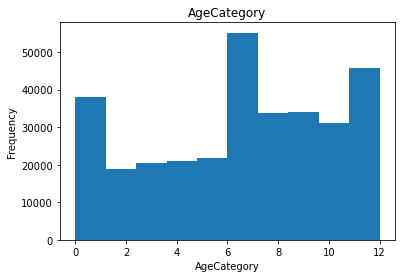

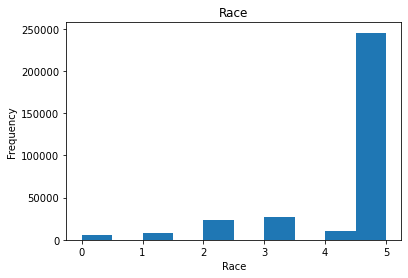

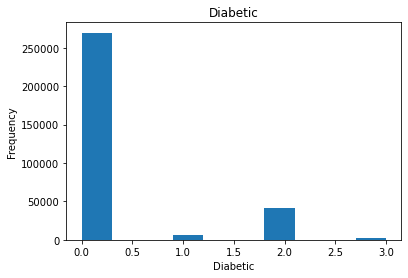

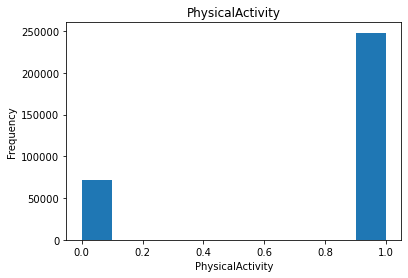

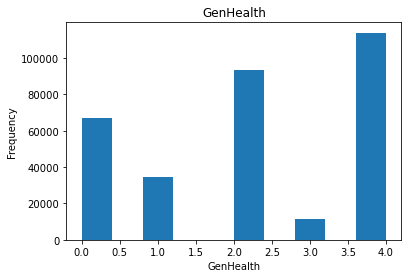

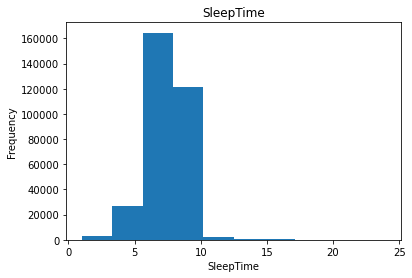

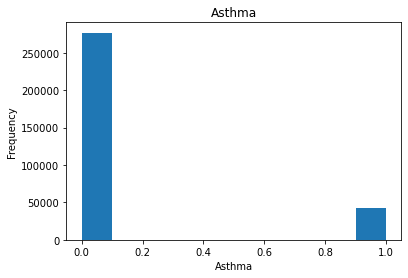

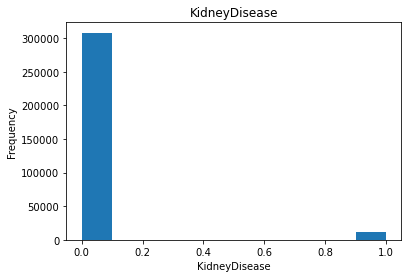

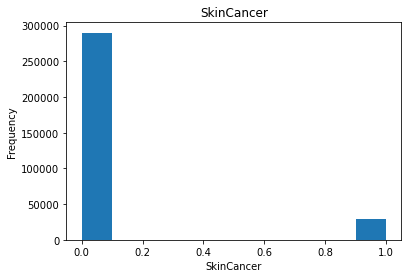

In [71]:
# Plot some histograms to see if the variables are skewed.

for i in data:
    data.loc[:,i].plot(kind='hist', title=i)
    plt.xlabel(i)
    plt.show()

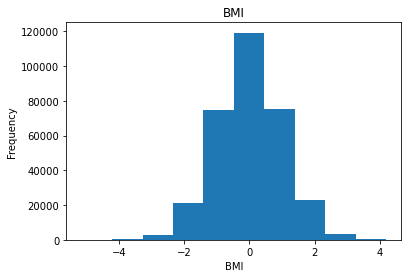

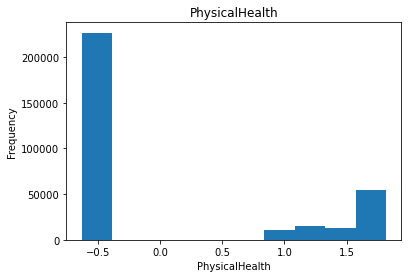

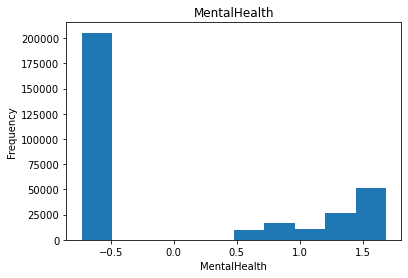

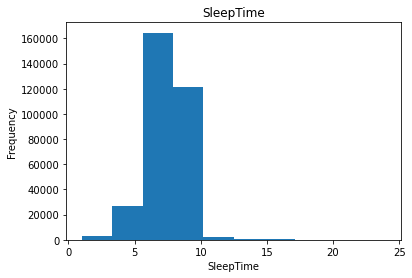

In [70]:
# Plot some histograms to see if the variables are skewed.

for i in data2:
    data2.loc[:,i].plot(kind='hist', title=i)
    plt.xlabel(i)
    plt.show()

In [33]:
data3 = data

In [34]:
data3[floatVarNames] = data2[floatVarNames]

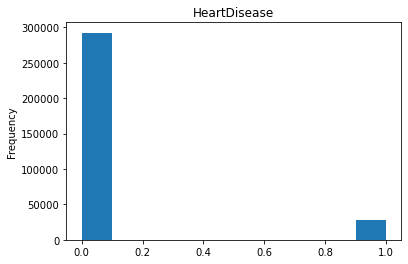

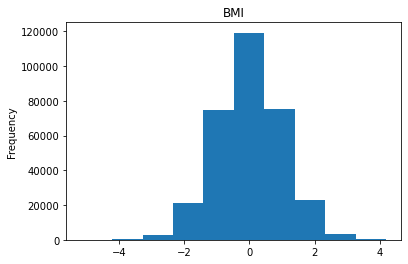

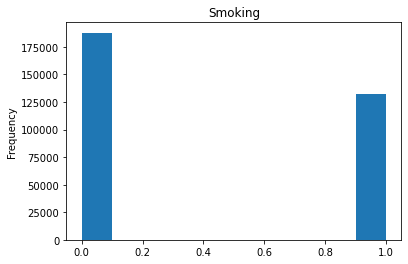

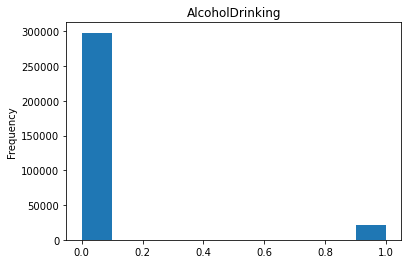

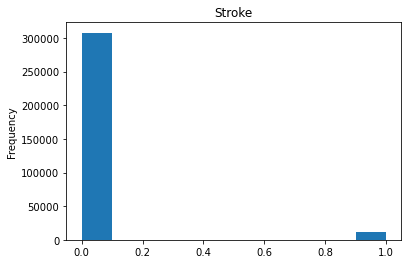

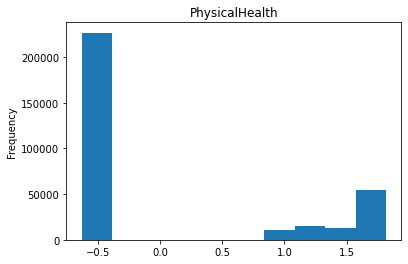

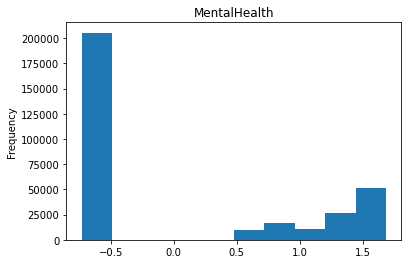

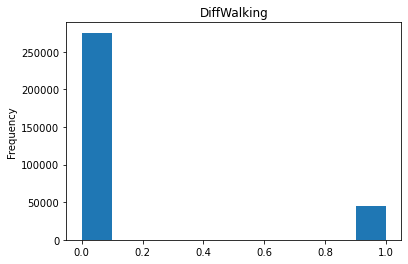

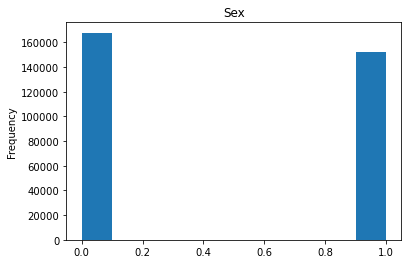

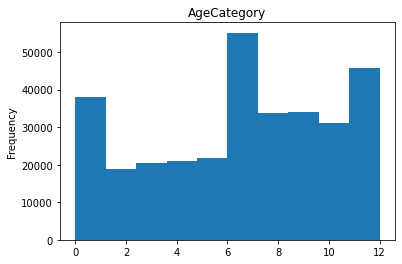

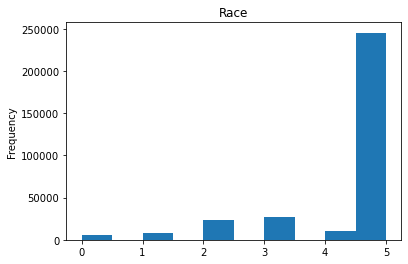

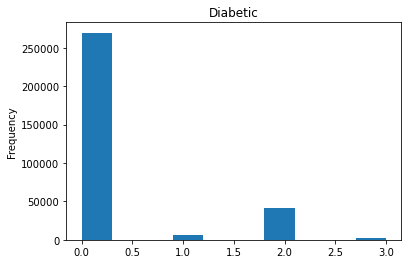

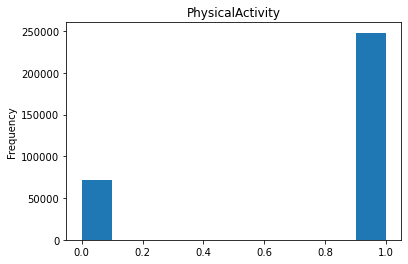

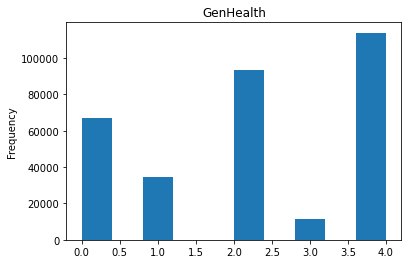

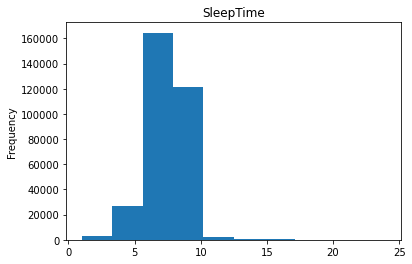

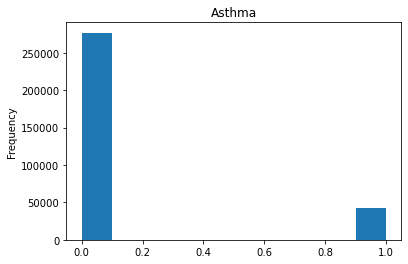

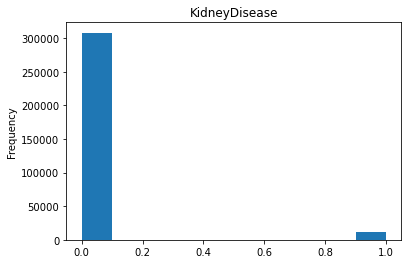

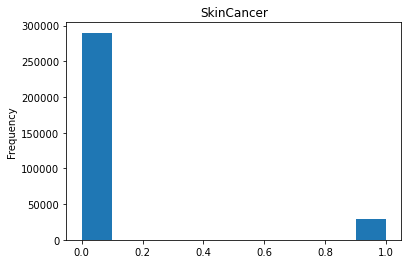

In [35]:
# Plot some histograms to see if the variables are skewed.

for i in data3:
    data3.loc[:,i].plot(kind='hist', title=i)
    plt.show()

In [38]:
X, y = data3.loc[:, data3.columns != 'HeartDisease'], data3['HeartDisease']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [95]:
# Print available scoring metrics.

from sklearn.metrics import SCORERS
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
logreg = LogisticRegression(max_iter=1000)
repeatedKfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
scoring = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1', 'roc_auc', 'neg_root_mean_squared_error']
scores = cross_validate(logreg, X_train, np.where(y_train==1,1,0), cv=repeatedKfold, scoring=scoring, n_jobs=2, verbose=1)

dfscores = pd.DataFrame(scores).mean()

print(dfscores)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   34.6s


fit_time                            1.362015
score_time                          0.037308
test_accuracy                       0.915791
test_recall                         0.094734
test_precision                      0.534378
test_balanced_accuracy              0.543520
test_f1                             0.160888
test_roc_auc                        0.829188
test_neg_root_mean_squared_error   -0.290185
dtype: float64


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.2min finished


In [85]:
# Predict test data.

# Instantiate the logistic regression.
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)

In [91]:
cr = classification_report(y_test, y_pred)
print(cr)
from sklearn.metrics import r2_score
rmse
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print("\nR^2 with all variables: {:.2f}\n".format(r2_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87649
           1       0.52      0.09      0.15      8290

    accuracy                           0.91     95939
   macro avg       0.72      0.54      0.55     95939
weighted avg       0.89      0.91      0.89     95939

Accuracy :  0.9141016687686968

R^2 with all variables: -0.09



In [66]:
print(data2[floatVarNames].skew())

BMI              -0.010201
PhysicalHealth    1.000131
MentalHealth      0.718716
SleepTime         0.679035
dtype: float64


In [73]:
len(X_train)

223856

In [74]:
len(X_test)

95939

0.29308417089857175

In [78]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

r2: -0.08811201400541835


In [ ]:
# Predict test data.

# Instantiate the logistic regression.
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)